### This notebook demonstrates how the order of a filter affects noise removal from a signal.

First, we create a signal of 1.2Hz. We add noise to it by incorporating other frequencies. We then use a Butterworth low pass filter to filter out the noise.

In [115]:
fs = 50
T = 5.0         # signal is 5 seconds long
n = int(T * fs) # total number of samples in the signal
t = np.linspace(0, T, n, endpoint=False)

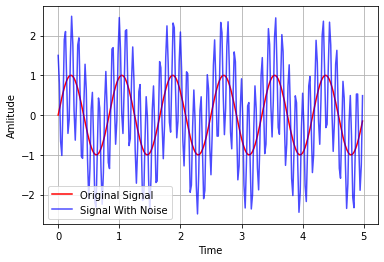

In [116]:
#original signal of 1.2Hz
signal = np.sin(2*np.pi*1.2*t)
noise = 1.5*np.cos(2*np.pi*9*t) + 0.5*np.sin(2*np.pi*50.0*t)
data = signal + noise
plt.plot(t,signal,'r')
plt.xlabel("Time")
plt.ylabel("Amlitude")
plt.plot(t,data, 'b', alpha=0.7)
plt.legend(['Original Signal', 'Signal With Noise'])
plt.grid()

In [117]:
# filter the signal to remove the noise
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

With order=1, we observe multiple frequencies in the filtered plot.

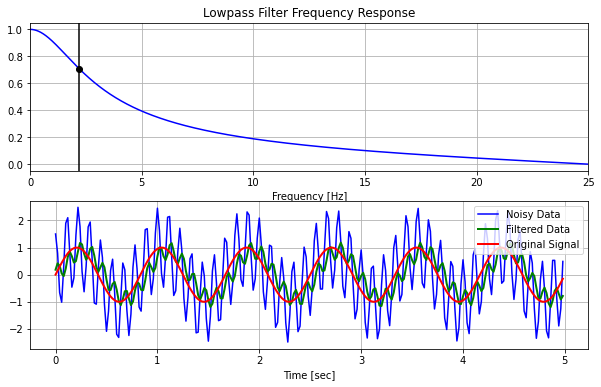

In [118]:
cutoff = 2.2  # desired cutoff frequency of the filter, Hz
order = 1
y = butter_lowpass_filter(data, cutoff, fs, order)

# Plot the frequency response.
b, a = butter_lowpass(cutoff, fs, order)
w, h = freqz(b, a, worN=8000)
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

plt.subplot(2,1,2)
plt.plot(t, data, 'b-', label='Noisy Data')
plt.plot(t, y, 'g-', linewidth=2, label='Filtered Data')
plt.plot(t, signal, 'r-', linewidth=2, label='Original Signal')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

With Order = 2, we observe that ripples are relatively reduced in the filtered signal. But they still exist as higher frequency are allowed to pass in the transition band.

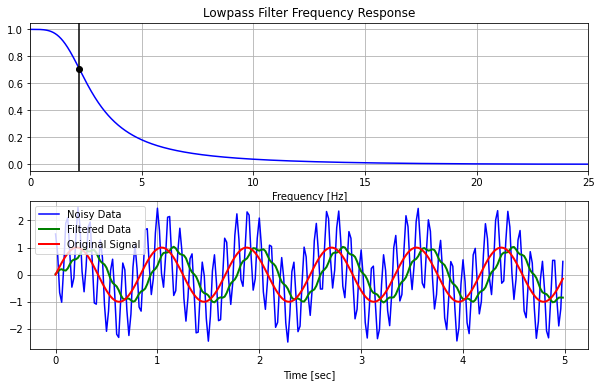

In [119]:
order = 2
cutoff = 2.2  # desired cutoff frequency of the filter, Hz

y = butter_lowpass_filter(data, cutoff, fs, order)

# Plot the frequency response.
b, a = butter_lowpass(cutoff, fs, order)
w, h = freqz(b, a, worN=8000)
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

plt.subplot(2,1,2)
plt.plot(t, data, 'b-', label='Noisy Data')
plt.plot(t, y, 'g-', linewidth=2, label='Filtered Data')
plt.plot(t, signal, 'r-', linewidth=2, label='Original Signal')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

<strong>Higher the order, more close the frequency response of the low pass filter to an idle filter</strong>

### Question: Find maximum in a rotated array

In [11]:
import timeit
import random
def findmax(arr, l, h):
  #mid element
  if (h < l):
    return arr[0];
  if (h == l):
    return arr[l];

  mid = l+(h-l)//2;

  #check if the mid ele is the max
  if (mid < h and arr[mid+1] < arr[mid]):
    return arr[mid]

  if (mid > l and arr[mid] < arr[mid-1]):
    return arr[mid-1];

  if (arr[l] > arr[mid]):
    return findmax(arr, l, mid-1);
  else:
    return findmax(arr, mid+1, h);

In [2]:
def rotateArray(arr, n, d):
    temp = []
    i = 0
    while (i < d):
        temp.append(arr[i])
        i = i + 1
    i = 0
    while (d < n):
        arr[i] = arr[d]
        i = i + 1
        d = d + 1
    arr[:] = arr[: i] + temp
    return arr

In [14]:
N = []
timeR = []

for limit in range(25, 10000, 20):
    #print(limit)
    ar = [i for i in range(limit)]
    ar = rotateArray(ar, len(ar), random.randint(1,len(ar)-1))
    
    time = %timeit -o findmax(ar, 0, len(ar)-1)
    timeR.append(time.average)
    
    N.append(limit)
    

3.81 µs ± 179 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.66 µs ± 192 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.01 µs ± 216 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.29 µs ± 235 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.39 µs ± 215 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.44 µs ± 693 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.36 µs ± 226 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.52 µs ± 182 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.37 µs ± 303 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.35 µs ± 246 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.1 µs ± 757 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.77 µs ± 212 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
The slowest run took 8.09 times longer than the fastest. This could mean that an intermediate result is being cac

5.14 µs ± 215 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.92 µs ± 212 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.03 µs ± 458 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.91 µs ± 344 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.37 µs ± 455 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.14 µs ± 461 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.22 µs ± 573 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.08 µs ± 283 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.94 µs ± 354 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.01 µs ± 293 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.48 µs ± 194 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.9 µs ± 138 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.17 µs ± 124 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.29 µs ± 255 ns per loop (mean ± std. 

6.8 µs ± 578 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.02 µs ± 363 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.95 µs ± 825 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.64 µs ± 697 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.72 µs ± 443 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
7.18 µs ± 913 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
7.14 µs ± 809 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.11 µs ± 810 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.13 µs ± 914 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.15 µs ± 532 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.41 µs ± 482 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.6 µs ± 1.05 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
7.15 µs ± 2.95 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.39 µs ± 1.41 µs per loop (mean ± std

8.2 µs ± 1.13 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.88 µs ± 322 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.44 µs ± 928 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.73 µs ± 1.46 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.56 µs ± 808 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.01 µs ± 367 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.14 µs ± 574 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
7 µs ± 449 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
7.21 µs ± 849 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.87 µs ± 475 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.05 µs ± 503 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.85 µs ± 379 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.1 µs ± 623 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.78 µs ± 270 ns per loop (mean ± std. de

5.62 µs ± 1.17 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.17 µs ± 153 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.77 µs ± 1.23 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.56 µs ± 779 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.31 µs ± 507 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
7.04 µs ± 784 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.35 µs ± 345 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.11 µs ± 1.1 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.11 µs ± 406 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.85 µs ± 220 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
7.59 µs ± 500 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.2 µs ± 329 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.39 µs ± 370 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.18 µs ± 582 ns per loop (mean ± std

Text(0, 0.5, 'Time Taken')

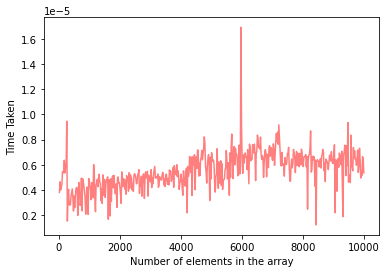

In [18]:
import matplotlib.pyplot as plt
plt.plot(N, timeR, 'r-', alpha=0.5)
plt.xlabel("Number of elements in the array")
plt.ylabel("Time Taken")